# TWEETS ON US AIRLINES

In [1]:
# The Dashboard 

import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

st.title("Sentiment Analysis of Tweets about US Airlines")
st.sidebar.title("Sentiment Analysis of Tweets about US Airlines")

st.markdown(" This application is a Streamlit app used to analyze the sentiment of the tweets 🐦 about US airlines ✈️ ")
st.sidebar.markdown(" This application is a Streamlit app used to analyze the sentiment of the tweets 🐦 about US airlines ✈️ ")

def load_data():
    data = pd.read_csv("Tweets.csv")
    data['tweet_created'] = pd.to_datetime(data['tweet_created'])
    return data

data = load_data()

st.sidebar.subheader("Show random tweet")
random_tweet = st.sidebar.radio('Sentiment type', ('positive','negative','neutral'))
st.sidebar.markdown(data.query('airline_sentiment == @random_tweet')[["text"]].sample(n=1).iat[0,0])

st.sidebar.markdown("### Number of tweets by sentiment type")
select = st.sidebar.selectbox('Vizualization type', ['Histogram', 'Pie Chart'], key='1')
sentiment_count = data['airline_sentiment'].value_counts()
sentiment_count = pd.DataFrame({'Sentiment' :sentiment_count.index, 'Tweets' :sentiment_count.values})

if not st.sidebar.checkbox('Hide', True):
    st.markdown("### Number of tweets by Sentiment")
    if select == "Histogram":
        fig = px.bar(sentiment_count, x='Sentiment', y='Tweets', color = 'Tweets', height= 500)
        st.plotly_chart(fig)
    else:
        fig = px.pie(sentiment_count, values='Tweets', names='Sentiment')
        st.plotly_chart(fig)

st.sidebar.subheader("When and where are the users tweeting from?")
hour = st.sidebar.slider("Hour of day", 0, 23)
modified_data = data[data['tweet_created'].dt.hour == hour]
if not st.sidebar.checkbox("Close", True, key='4'):
    st.markdown("### Tweets location based on the time of the day")
    st.markdown("%i, tweets between %i:00 and %i:00" % (len(modified_data), hour, (hour+1)%24))
    st.map(modified_data)
    if st.sidebar.checkbox("Show raw data", False):
        st.write(modified_data)


st.sidebar.subheader("Breakdown airline tweets by sentiment")
choice = st.sidebar.multiselect("Pick airlines", ('US Airways', 'United', 'American', 'Southwest', 'Delta', 'Virgin America'), key = '0')


if len(choice) >0:
    choice_data = data[data.airline.isin(choice)]
    fig_0 = px.histogram(choice_data, x='airline', y='airline_sentiment', histfunc='count', color='airline_sentiment', facet_col = 'airline_sentiment', labels={'airline_sentiment':'tweets'}, height=600, width=800)
    st.plotly_chart(fig_0)

st.sidebar.header("Word Cloud")
word_sentiment = st.sidebar.radio('Display word cloud for which sentiment?', ('positive', 'negative', 'neutral'))

if not st.sidebar.checkbox("Close", True, key = '3'):
    st.header('Word cloud for %s sentiment' % (word_sentiment))
    df = data[data['airline_sentiment']==word_sentiment]
    words = ' '.join(df['text'])
    processed_words = ' '.join([word for word in words.split() if 'http' not in word and word.startswith('@') and word != 'RT'])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color = 'white', height=600, width=800).generate(processed_words)
    fig, ax = plt.subplots()
    ax.imshow(wordcloud)
    ax.set_xticks([])
    ax.set_yticks([])
    st.pyplot(fig)
    st.set_option('deprecation.showPyplotGlobalUse', False)


2024-01-16 01:29:39.723 
  command:

    streamlit run E:\Software\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-01-16 01:29:39.975 Session state does not function when running a script without `streamlit run`


# REPORT

## DATA OVERVIEW

The dataset comprises tweets expressing sentiments about various US airlines, with each tweet uniquely identified by a "tweet_id." Sentiments are categorized as positive, negative, or neutral, accompanied by confidence levels in sentiment classification. Negative sentiments are further detailed with reasons and corresponding confidence levels.

Airlines mentioned in tweets include Virgin America, United, American, Southwest, US Airways and others. User Twitter handles are recorded in the "name" column. The dataset includes metrics such as "retweet_count" to gauge tweet popularity. The "text" column contains the actual tweet content, providing context for sentiment analysis.

Temporal aspects are covered by the "tweet_created" timestamp, allowing for trend analysis over time. Geographical data ("latitude" and "longitude") is available for some tweets, facilitating potential spatial analysis to uncover regional sentiment variations. The dataset aims to provide a comprehensive understanding of public sentiments toward different airlines on social media through a combination of sentiment analysis and various exploratory approaches.

## OBJECTIVES

In order to extract meaningful insights from the dataset on US airline-related tweets, the following key objectives have been identified for analysis and visualization in the report:

#### 1. Random Tweets Based on Sentiments
   - Objective: Showcase a selection of random tweets from the dataset to provide a qualitative understanding of the sentiments expressed by users towards different airlines.
   - Methodology: Utilize a random sampling approach to present a diverse set of tweets representing positive, negative, and neutral sentiments.

#### 2. Number of Tweets Based on Sentiments
   - Objective: Quantify and visualize the distribution of sentiments (positive, negative, neutral) within the dataset to understand the overall sentiment landscape.
   - Methodology: Generate a sentiment distribution chart to illustrate the prevalence of each sentiment category across the tweets.

#### 3. Tweets Location Based on the Time of the Day
   - Objective: Investigate the spatial and temporal aspects of tweets by mapping their locations against the time of the day.
   - Methodology: Utilize the "tweet_created" timestamp along with geographical data (latitude and longitude) to create a time-based geographical visualization, highlighting patterns in tweet activity.

#### 4. Breakdown Airline Tweets by Sentiment
   - Objective: Analyze and compare the distribution of sentiments across different airlines to identify patterns or variations in public perception.
   - Methodology: Group tweets by airline and sentiment category, creating a visual representation that allows for a comprehensive understanding of each airline's sentiment profile.

#### 5. Word Cloud Based on Sentiments
   - Objective: Uncover common themes and frequently used words associated with different sentiments by generating word clouds.
   - Methodology: Process and analyze the "text" column, creating distinct word clouds for positive, negative, and neutral sentiments, visually representing the most prominent words in each category.

By addressing these objectives, the report aims to provide a comprehensive and insightful analysis of the sentiments expressed in US airline-related tweets, offering valuable information for stakeholders in the aviation industry.

## OBSERVATIONS

### 1. Random Tweets based on the sentiment

In the initial stage of the dashboard analysis, a dynamic feature has been incorporated, enabling users to select a random tweet based on the chosen sentiment. This interactive functionality enhances the exploration of the dataset, allowing users to focus on specific sentiments of interest. By incorporating a sentiment-based selection mechanism, users can gain insights into the diverse range of opinions and expressions within the dataset. This feature not only facilitates a more targeted examination of tweets but also provides a user-friendly and customizable experience for exploring the sentiments expressed in the data.

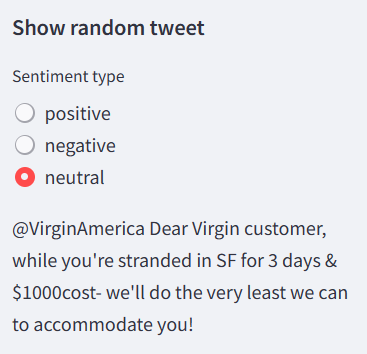

### 2. Number of Tweets based on the sentiments

The dashboard has been further enriched with a comprehensive sentiment analysis summary, presenting the number of tweets categorized under each sentiment. This feature provides a quick and intuitive overview of the sentiment distribution within the dataset. Users have the flexibility to choose between two popular visualization options – a histogram or a pie chart – allowing for a tailored visual representation based on individual preferences or analytical requirements.

The incorporation of multiple visualization choices adds versatility to the dashboard, catering to users with varying preferences for data presentation. Whether opting for a histogram to showcase sentiment distribution trends or a pie chart for a concise, proportional depiction, users can seamlessly toggle between these views. Additionally, the option to hide this sentiment distribution visualization from the dashboard ensures a clutter-free interface when users wish to focus on other specific aspects of the data. This thoughtful design not only enhances the aesthetic appeal of the dashboard but also prioritizes user control and customization for an optimal analytical experience.

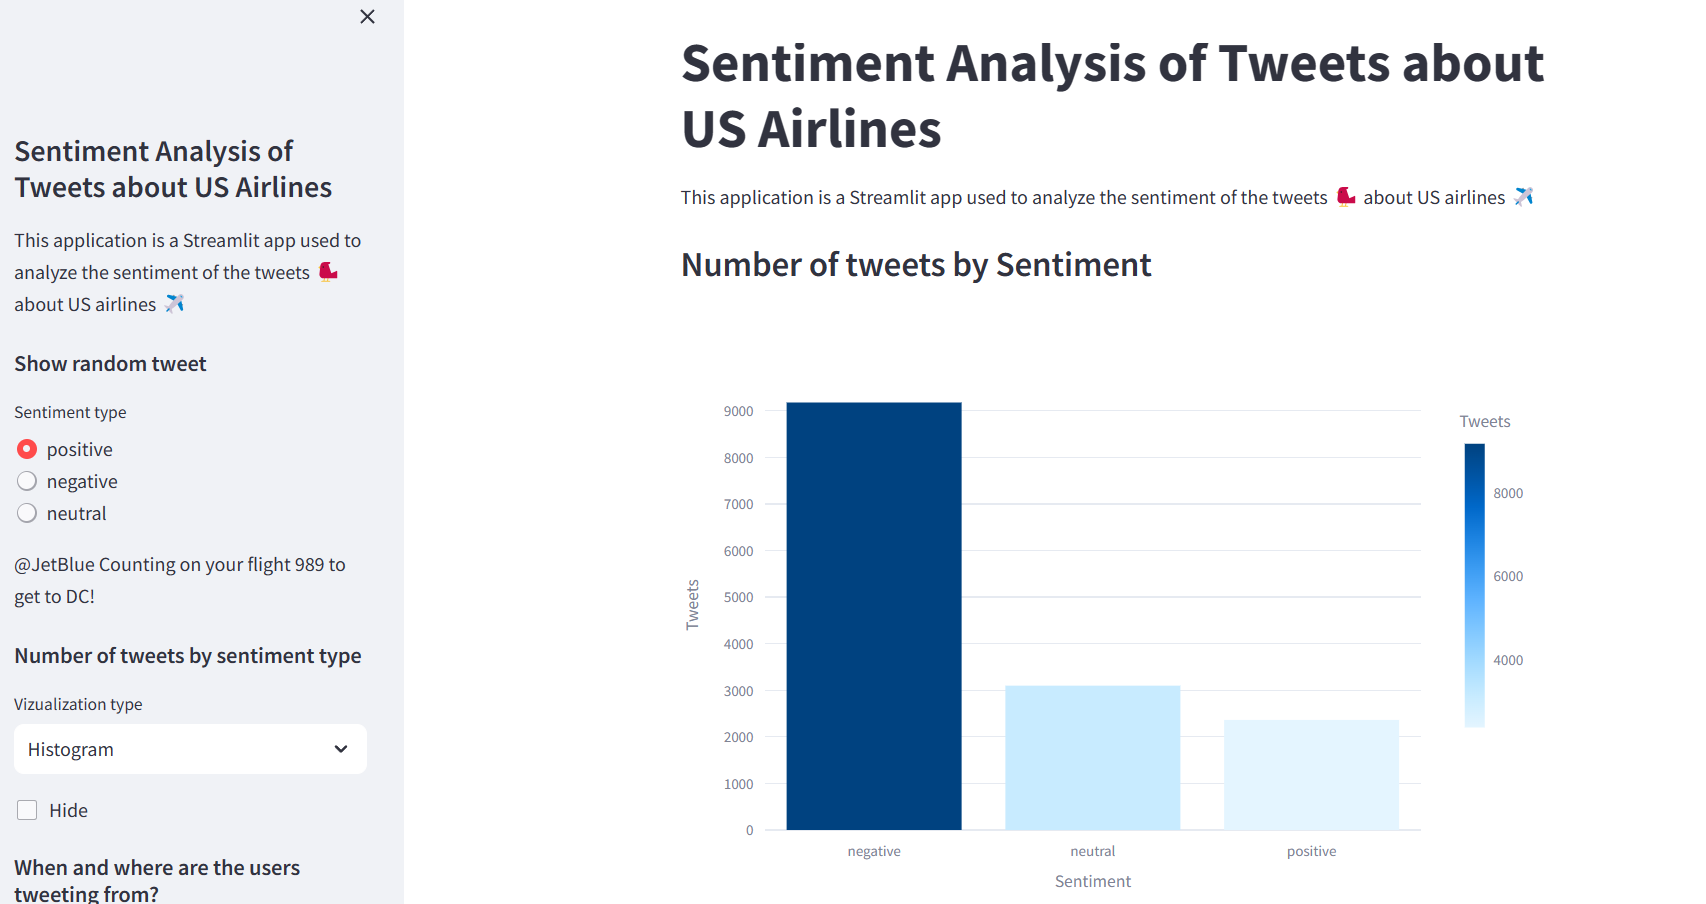

### 3. Tweets location based on the time of the day

In the enhanced dashboard, a geospatial and temporal analysis feature has been seamlessly integrated, allowing users to gain insights into the temporal distribution and geographical origins of the tweets. By selecting the 'Hour of Day' option, users can dynamically observe how tweet activity varies throughout different hours of the day. This information is then intuitively visualized on a map within the dashboard, providing a geographically contextualized representation of tweet frequencies during specific time intervals.

A user-friendly addition to this feature is the ability to toggle its visibility on and off, empowering users to decide whether they want to include this geographical and temporal analysis in their current analytical focus or temporarily remove it for a clearer view of other metrics.

Moreover, the dashboard introduces a valuable 'Show Raw Data' option. When activated, this feature unveils the raw data associated with the selected time frame and geographical distribution directly below the map. This presents users with the opportunity to delve deeper into the specifics of the tweets, facilitating a more granular analysis and offering a comprehensive understanding of the content and context associated with the selected time and location. The thoughtful inclusion of these options enhances the dashboard's functionality and user interactivity, promoting a more insightful exploration of the dataset.

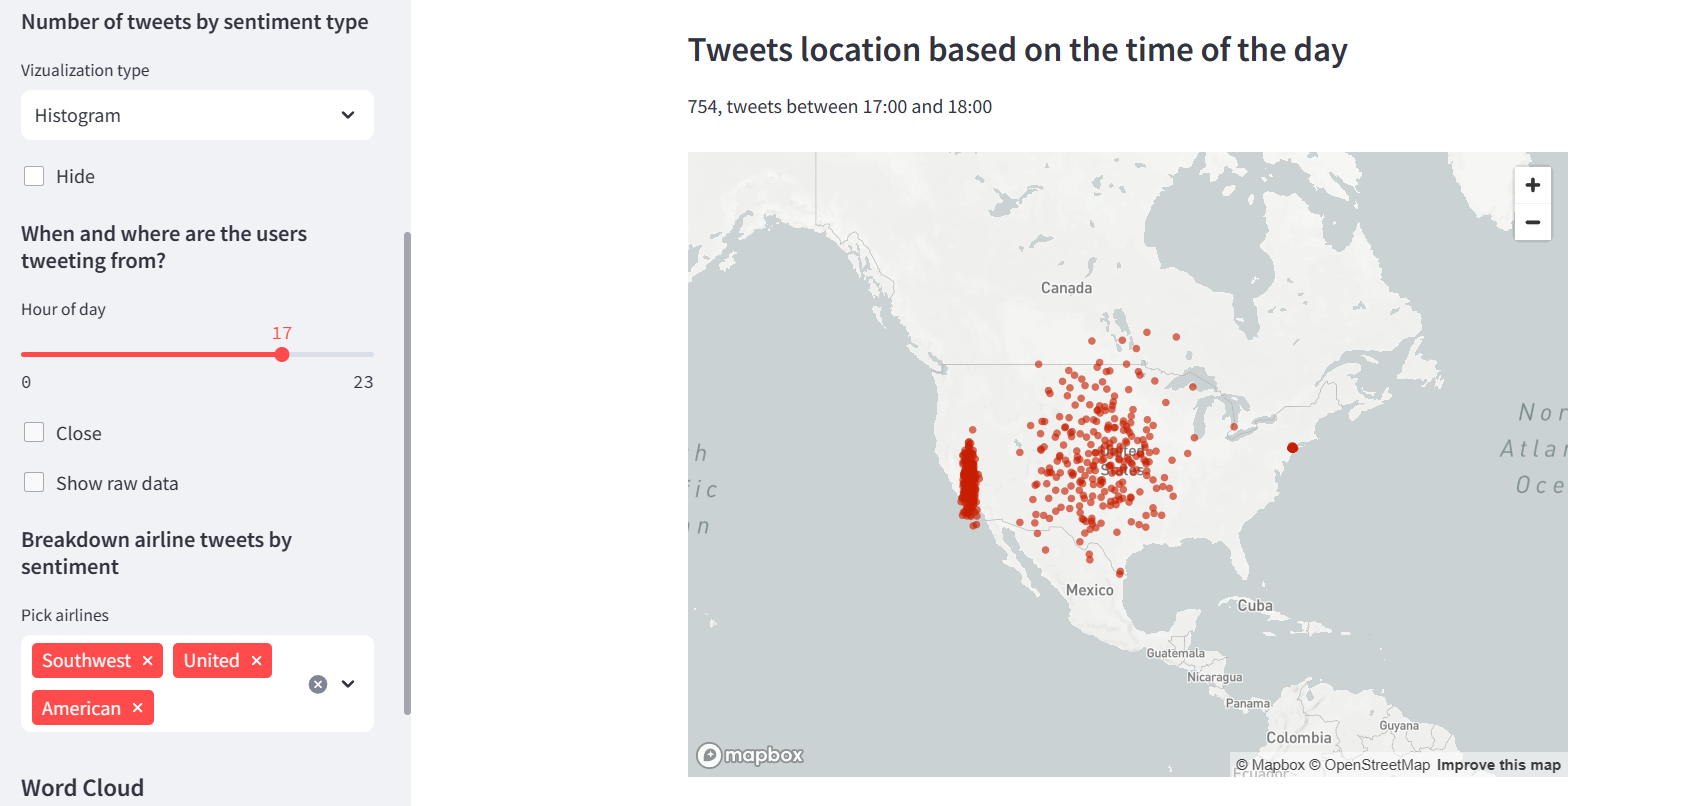

### 4. Breakdown airline tweets by sentiment

The dashboard's functionality extends to the comprehensive analysis of tweets across different airlines, facilitating a nuanced understanding of sentiment distribution for each airline in the dataset. Users are empowered to selectively pick airlines of interest, and the dashboard dynamically generates a graphical representation illustrating the breakdown of tweets by sentiment for the chosen airlines.

This feature allows for direct and instant comparisons between multiple airlines, offering a valuable tool for users to discern the varying sentiment patterns associated with each airline. Whether it's evaluating the overall sentiment performance of a specific airline or conducting a comparative analysis between two or more, this functionality provides a user-friendly and visually engaging means to interpret sentiment distribution across the aviation industry.

The flexibility to choose specific airlines for comparison enhances the dashboard's adaptability to user preferences and research objectives. This feature not only streamlines the analysis process but also enables users to derive actionable insights by identifying trends, patterns, or potential areas of improvement for individual airlines in the context of customer sentiments.

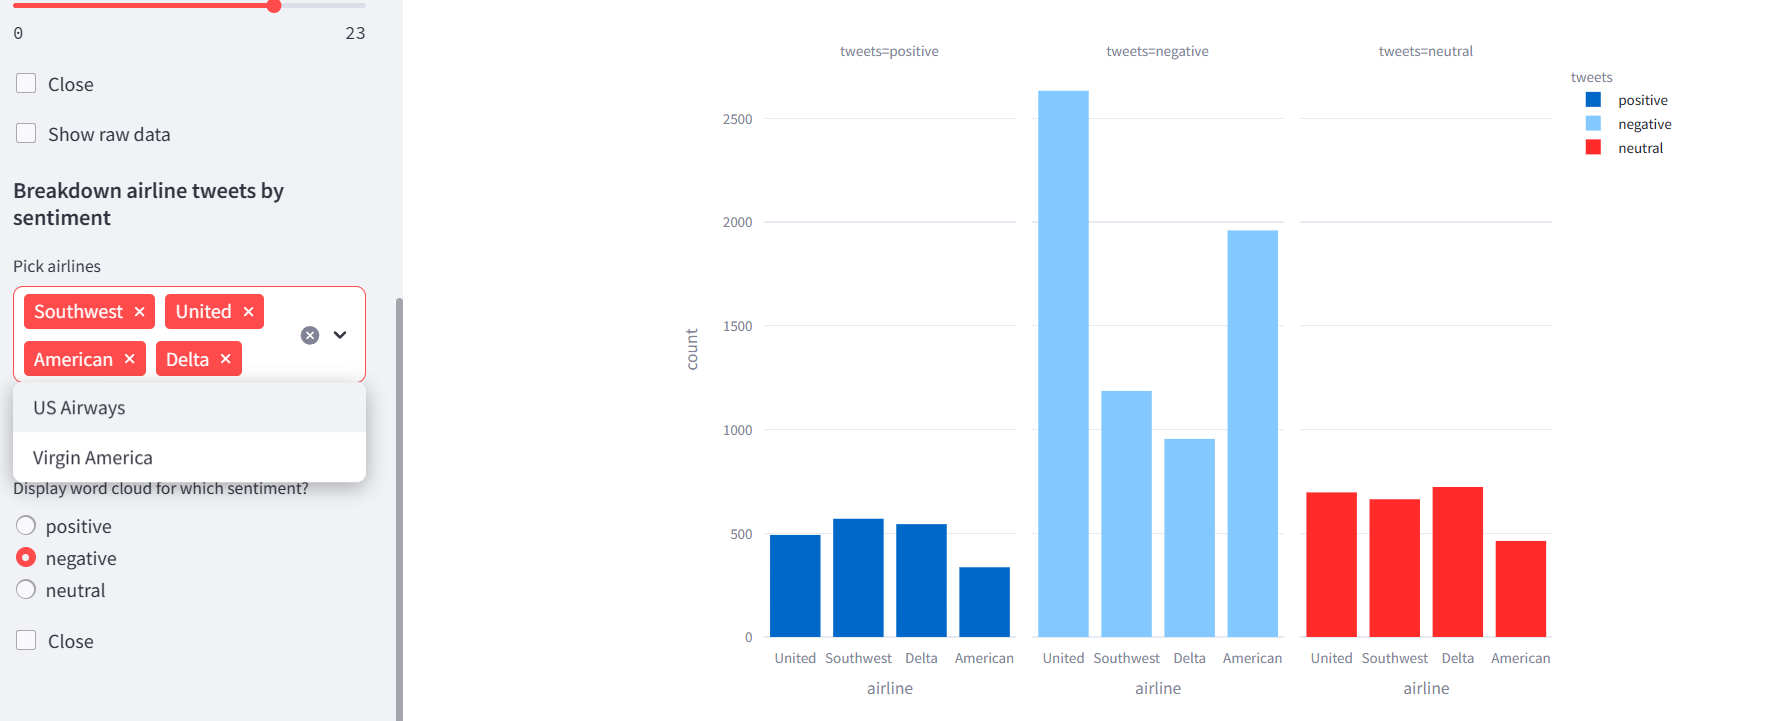

### 5. Word cloud based on sentiments

The dashboard incorporates an engaging and visually impactful element with the inclusion of a word cloud feature. This functionality adds an extra layer to the analysis by providing a visual representation of the airlines about which there have been the highest to lowest number of tweets associated with a selected sentiment. Users can choose a specific sentiment category, and the corresponding word cloud dynamically generates, showcasing the names of the airlines.

The word cloud serves as an intuitive and quick reference for identifying the airline with the chosen sentiment. Larger and bolder words in the cloud indicate higher frequency in the dataset. This feature aids in grasping the essence of the sentiment expressed in tweets.

Users retain control over the dashboard's appearance by having the option to show or hide the word cloud as per their preference. This flexibility enhances the user experience, allowing for a more tailored and focused analysis. Whether users wish to delve into the specific language used in positive, negative, or neutral tweets, the word cloud feature provides a visually appealing and insightful way to explore the textual content of the dataset.

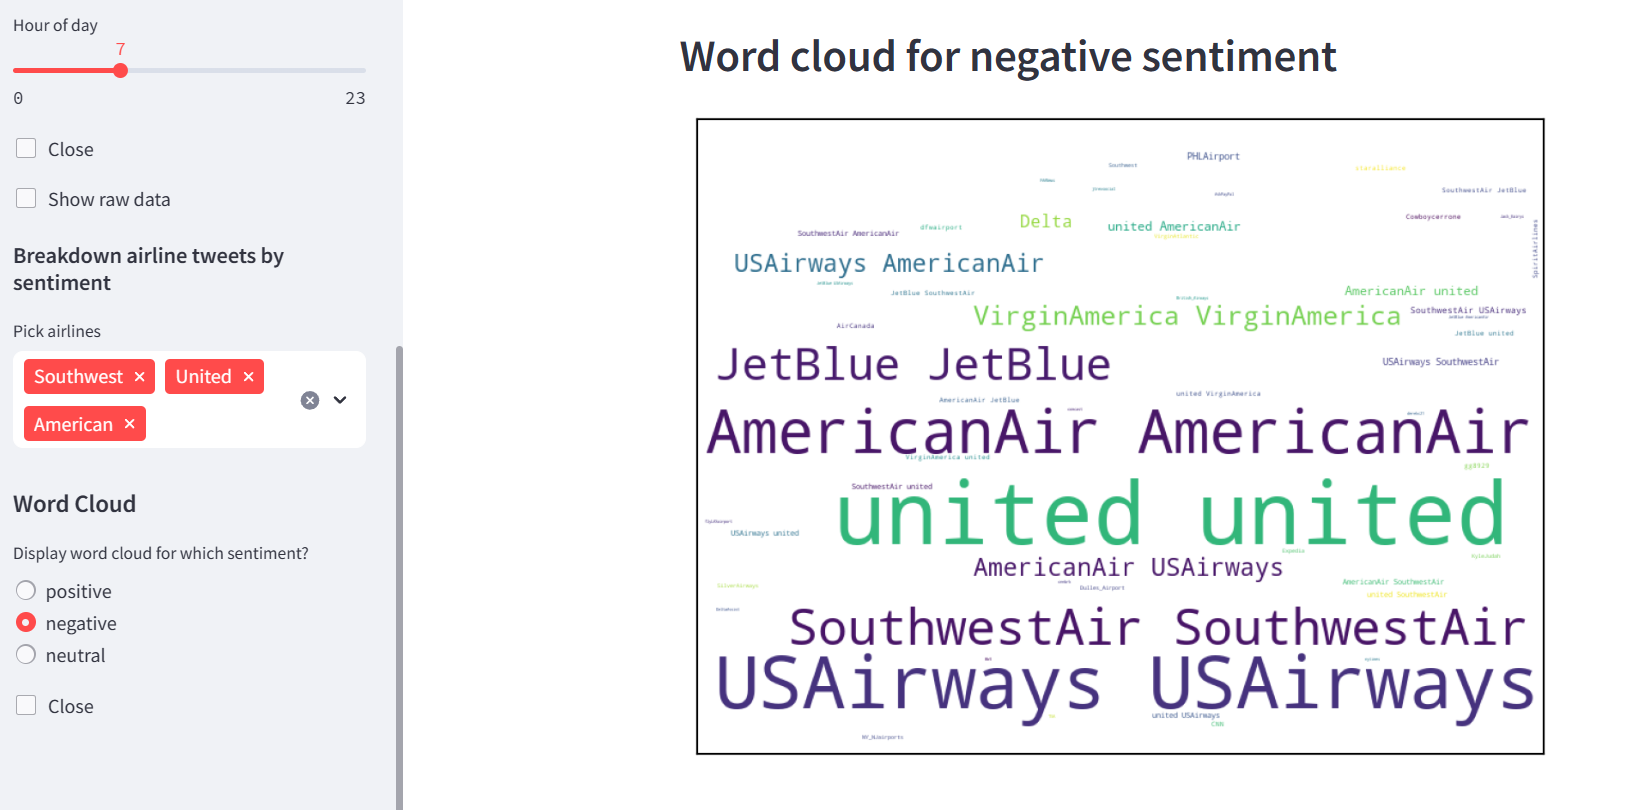

## MANAGERIAL IMPLICATIONS AND INSIGHTS

#### 1. **Understanding Sentiment Dynamics:**
   - **Implication:** The dynamic feature allowing users to explore random tweets based on sentiment provides an opportunity for management to gauge the varied opinions of customers. This can be crucial for understanding the nuanced aspects of customer sentiment.
   - **Insight:** By delving into random tweets, management can identify specific language patterns, recurring themes, and individual experiences that contribute to overall sentiment. Addressing these nuances can lead to more targeted improvements in customer satisfaction.

#### 2. **Strategic Decision-Making Based on Sentiment Distribution:**
   - **Implication:** The sentiment analysis summary offers a quick and clear view of the sentiment distribution within the dataset. This insight can guide strategic decision-making by focusing on areas that need improvement or leveraging strengths.
   - **Insight:** Identifying the predominant sentiment allows management to align strategies and resources to address specific customer concerns. For instance, a higher number of negative sentiments may signal a need for immediate attention to service quality.

#### 3. **Optimizing Operational Strategies:**
   - **Implication:** The geospatial and temporal analysis feature helps management understand when and where tweet activity is concentrated. This insight can be invaluable for optimizing operational strategies, resource allocation, and customer support efforts.
   - **Insight:** Recognizing peak tweet times and specific geographical regions with heightened activity can inform the scheduling of customer service representatives and targeted marketing efforts to address localized concerns.

#### 4. **Enhancing Brand Perception Through Comparative Analysis:**
   - **Implication:** The breakdown of airline tweets by sentiment enables a direct comparison between different airlines. This information can be leveraged to enhance brand perception and identify areas for improvement.
   - **Insight:** Management can use this feature to benchmark their airline against competitors, understand areas of strength and weakness, and strategically position their brand to improve customer satisfaction and loyalty.

#### 5. **Leveraging Textual Insights for Service Improvement:**
   - **Implication:** The word cloud feature provides a visually impactful representation of the most frequently mentioned airlines in tweets of a selected sentiment. This can guide management in understanding the specific aspects of service that resonate with customers.
   - **Insight:** Identifying keywords associated with sentiments allows management to focus on specific service elements that have a significant impact on customer perception. This insight can inform targeted service improvements and marketing strategies.

In summary, the dashboard's features offer management a multifaceted view of customer sentiments, enabling strategic decision-making, resource optimization, and targeted improvements in service quality. The ability to compare sentiments across airlines and delve into the textual content of tweets provides actionable insights for enhancing overall customer satisfaction and brand perception in the highly competitive aviation industry.

###  SOURCES

1. Dataset :- https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment/data
2. Github For Inspiration
3. OpenAI For Code Reference
